https://softeer.ai/practice/info.do?eventIdx=1&psProblemId=631

## 제한시간 : C/C++(2초)/Java/JS/Python(4초)| 메모리 제한 : 1024MB


현대자동차그룹의 트럭 디자이너로 일하는 당신은 신차의 크기를 결정하려고 한다.
총 N명의 소비자에게 신차 구매의사를 조사했다.

i (1≤i≤N)번째 소비자는 Ai개의 제안을 보냈는데, 이 중 j (1≤j≤Ai)번째 제안은 “신차의 크기가 Si,j 이상이라면 차량 한 대를 Pi,j원에 구매할 용의가 있다”는 것이다.

하지만 소비자 각각에 맞춘 차량을 생산하기에는 설비를 위한 비용이 막대해질 것이므로, 신차의 크기를 하나로 결정해야한다.

각 소비자는 트럭을 2대 이상 구매하지는 않을 것이다. 따라서, 당신은 각 소비자마다 그 소비자가 제시한 제안 중 하나를 수락하거나, 그 소비자의 제안을 모두 거절할 것이다. 이 때 당신이 정한 신차의 크기가 소비자의 여러가지 제안을 만족할 수 있다.

당신은 매출에 따라 신차의 크기를 얼마로 설정해야 하는지를 알아보고자, M가지의 시나리오를 고려해 보기로 하였다. 당신은 모든 k (1≤k≤M)에 대해, 총 Qk원의 매출을 내려면, 신차의 크기가 최소 얼마여야 하는지를 구해야 한다.


###  제약조건
- 주어지는 모든 수는 정수이다.
- 1≤N≤100,000
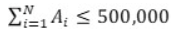
- 모든 i,j (1≤i≤N, 1≤j≤Ai)에 대해 1≤Si,j,Pi,j≤109
- 1≤M≤100,000
- 모든 k (1≤k≤M)에 대해, 1≤Qk≤109


### 입력형식
- 첫 번째 줄에 N이 주어진다. 다음 N개의 줄에는 소비자의 제안에 대한 정보가 주어진다.
- 이 중 i (1≤i≤N)번째 줄의 형식은 다음과 같다: Ai Si,1 Pi,1 … Si,Ai Pi,Ai
- 그 다음 줄에 시나리오의 개수 M이 주어진다.
- 마지막 줄에 M개의 정수 Q1, Q2,…, QM이 공백 하나씩을 사이로 두고 주어진다.


### 출력형식
- M개의 수를 한 칸의 공백을 두고 출력한다. 이 중 k (1≤k≤M)번째 수는
- Qk원 이상의 매출을 낼 수 있다면, 이 때 신차의 최소 크기이다.
- Qk원 이상의 매출을 낼 수 없다면, -1이다.

In [46]:
n = int(input())
Suggests = [[] for _ in range(n)] # 소비자의 제안 저장
Suggests

5


[[], [], [], [], []]

In [58]:
Sizes

[11, 10, 10, 9, 9, 9, 8, 5, 5, 3, 1]

In [59]:
Sizes = sorted(set(Sizes), reverse = True)
Sizes

[11, 10, 9, 8, 5, 3, 1]

In [47]:
Sizes = [] # 소비자가 제안한 사이즈 저장

In [48]:
from collections import deque
for i in range(n): # n 명의 소비자
    a, *arr = map(int, input().split()) 
    arr = deque(arr)
    for _ in range(a): # a개의 제안
        s = arr.popleft() # 사이즈
        Sizes.append(s)
        Suggests[i].append((s, arr.popleft())) #사이즈, 가격

Sizes = sorted(set(Sizes), reverse = True) # 제안된 사이즈 내림차순 정렬

Suggests, Sizes

2 10 17 5 19
2 8 7 10 21
3 3 3 9 13 11 14
3 5 3 1 2 9 15
1 9 11


([[(10, 17), (5, 19)],
  [(8, 7), (10, 21)],
  [(3, 3), (9, 13), (11, 14)],
  [(5, 3), (1, 2), (9, 15)],
  [(9, 11)]],
 [11, 10, 10, 9, 9, 9, 8, 5, 5, 3, 1])

In [49]:
m = int(input())
Q = list(map(int, input().split())) # 결과 출력용 Q 저장

11
21 31 35 54 79 80 100 3 5 7 9


In [50]:
Revenues = [] # 제안된 사이즈 별 매출 계산 저장 # 내림차순

In [51]:
for size in Sizes: # 사이즈별로
    total = 0 # 매출값 변수
    for suggest in Suggests: # 제안 한줄씩
        max_money = 0 # 제안 중 1개만 채택 가능
        for s,p in suggest:
            if s <= size: # 제안된 사이즈보다 작으면
                max_money = max(max_money, p) # 매출값 max 확인
        total += max_money
    Revenues.append(total)

Revenues

[80, 79, 79, 65, 65, 65, 32, 25, 25, 5, 2]

In [52]:
Sizes

[11, 10, 10, 9, 9, 9, 8, 5, 5, 3, 1]

In [53]:
Revenues

[80, 79, 79, 65, 65, 65, 32, 25, 25, 5, 2]

In [54]:
Q

[21, 31, 35, 54, 79, 80, 100, 3, 5, 7, 9]

In [55]:
def find_minSizes(Revenues, Sizes, n):
    if n > Revenues[0]:
        return -1
    
    for i, r in enumerate(Revenues):
        if r < n:
            return Sizes[i-1]
        if r == n:
            return Sizes[i]

In [56]:
for n in Q:
    print(find_minSizes(Revenues, Sizes, n), end=' ')
    

5 8 9 9 10 11 -1 3 3 5 5 

제출

In [57]:
# 입력
n = int(input())
Suggests = [[] for _ in range(n)] # 소비자의 제안 저장
Sizes = [] # 소비자가 제안한 사이즈 저장

from collections import deque
for i in range(n): # n 명의 소비자
    a, *arr = map(int, input().split()) 
    arr = deque(arr)
    for _ in range(a): # a개의 제안
        s = arr.popleft() # 사이즈
        Sizes.append(s)
        Suggests[i].append((s, arr.popleft())) #사이즈, 가격
Sizes = sorted(set(Sizes), reverse = True) # 제안된 사이즈 내림차순 정렬

m = int(input())
Q = list(map(int, input().split())) # 결과 출력용 Q 저장

Revenues = [] # 제안된 사이즈 별 매출 계산 저장 # 내림차순
for size in Sizes: # 사이즈별로
    total = 0 # 매출값 변수
    for suggest in Suggests: # 제안 한줄씩
        max_money = 0 # 제안 중 1개만 채택 가능
        for s,p in suggest:
            if s <= size: # 제안된 사이즈보다 작으면
                if p > max_money:
                    max_money = p # 매출값 max 확인
        total += max_money
    Revenues.append(total)

    
def find_minSizes(Revenues, Sizes, n):
    if n > Revenues[0]:
        return -1
    
    for i, r in enumerate(Revenues):
        if r < n:
            return Sizes[i-1]
        if r == n:
            return Sizes[i]

for n in Q:
    print(find_minSizes(Revenues, Sizes, n), end=' ')

5
2 10 17 5 19
2 8 7 10 21
3 3 3 9 13 11 14
3 5 3 1 2 9 15
1 9 11
11
21 31 35 54 79 80 100 3 5 7 9
5 8 9 9 10 11 -1 3 3 5 5 